# 확률의 계산

## 동전 던지기

In [3]:
space = ['앞면', '뒷면']
event = ['앞면']

prob = lambda event, space : len(event) / len(space)
prob(event, space)

0.5

In [4]:
# 주사위 던지기
# 1번 던져 3이 나올 확률

space = [1,2,3,4,5,6]
event = [3]
prob(event, space)

0.16666666666666666

# 확률의 덧셈

# 주사위에서 짝수이거나 4보다 큰 수가 나올 확률

In [8]:
space = {1,2,3,4,5,6}
event_A = {2,4,6}
event_B = {5,6}

In [9]:
합집합 = event_A | event_B
합집합

{2, 4, 5, 6}

In [11]:
합집합의갯수 = len(합집합)
전체경우의수 = len(space)
확률_1 = 합집합의갯수 / 전체경우의수
확률_1

0.6666666666666666

# 2이하이거나 5이상인 눈이 나올 확률


In [12]:
space = {1,2,3,4,5,6}
event_C = {1,2}
event_D = {5,6}

In [13]:
set_add = event_C | event_D
set_add

{1, 2, 5, 6}

In [14]:
set_a = len(set_add)
whole_n = len(space)
r_1 = set_a / whole_n
r_1

0.6666666666666666

# 확률의 교집합

In [18]:
#주사위를 던져 짝수 & 2일 확률
#조건부 확률

sample_space = {1,2,3,4,5,6}
event_A = {2,4,6}
event_B = {2}
P_A = len(event_A) / len(sample_space) #A일 확률
P_B = len(event_B) / len(sample_space) #B일 확률
P_B_and_A_ele = event_A & event_B #교집합의 원소
P_B_and_A_ele

{2}

In [19]:
P_B_and_A = len(P_B_and_A_ele) / len(sample_space) #교집합이 나올 확률
P_B_and_A

0.16666666666666666

In [20]:
#조건부확률 : 짝수일때 2가 나올 확률
#P(B|A) P(B_and_A) P_A
P_B_given_A = P_B_and_A / P_A
P_B_given_A

0.3333333333333333

# 우도(가능도, Likelihood)

In [21]:
from scipy.stats import binom

In [22]:
n = 10
k = 8 #앞면의 횟수

#가설1 - 공정한 동전일 것이다
p1 = 0.5 #앞면이 나올 확률 - 공정할 경우

p1_likelihood = binom.pmf(k, n, p1) #조건, 총사건, 확률

p2 = 0.8
p2_likelihood = binom.pmf(k, n, p2) #조건, 총사건, 확률

p1_likelihood,p2_likelihood

(np.float64(0.04394531250000005), np.float64(0.30198988799999993))

가설1의 경우, 앞면이 8번 나올 확률은 4.4%   
가설2의 경우, 앞면이 8번 나올 확률은 30.2%

앞면 8번 나오는 관측값은 p=0.8인 모댈이 더 잘 설명한다. (우도가 크다)

# 기대값
x의 확률들의 평균

In [24]:
x_values = [1,2,3]
p_x = [1/6, 3/6, 2/6]

exp_value = 0
#기대값
for i in range(len(x_values)):
    exp_value += x_values[i] * p_x[i]

print(f'기대값: {exp_value:.5f}')


기대값: 2.16667


In [29]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

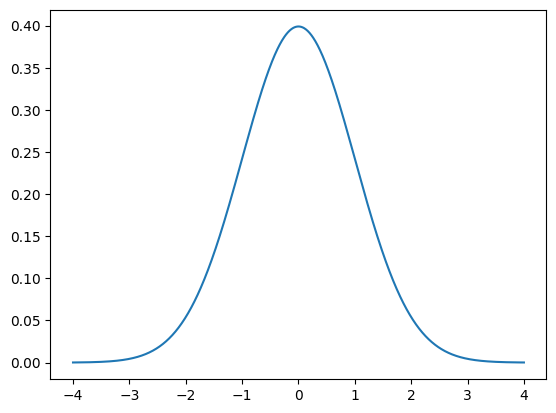

In [30]:
mu = 0 #확률
sigma = 1 #표준편차

x = np.linspace(-4, 4, 1000) #1000개의 값을 균일하게 쪼갬
y = norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x,y)
plt.show()


평균 = 0
평균을 중심으로 좌우 대칭인 정규분포 그래프

# 표집분포


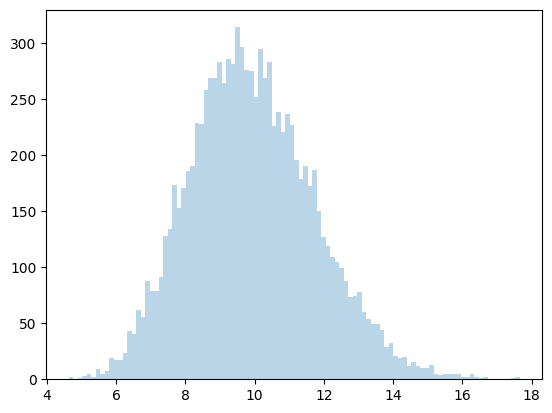

In [34]:
np.random.seed(0)
x_pop = np.random.exponential(scale=10, size=10000)
sample_mean = [np.mean(np.random.choice(x_pop, size=30))
               for _ in range(10000)]


plt.hist(sample_mean, bins=100, alpha=0.3)
plt.show()

# z점수

In [35]:
mu = 100
sigma = 10

x1 = 110 #z점수를 계산하려고 하는 원래 점수
x2 = 125

#z점수 = 원점수 - 편균 / 표준편차
z_x1 = (x1 - mu) / sigma
z_x2 = (x2 - mu) / sigma

z_x1, z_x2



(1.0, 2.5)

z_x1 = 0.8413 → #0.5에서 출발하기 때문에 0.3413이다
z_x2 = 0.9938 → 0.4938

0.4938 - 0.3413 = 0.1525 15%

전체 분포에서 x1~x2 사이의 면적

In [36]:
area_z_x1 = norm.cdf(z_x1) - norm.cdf(0)
area_z_x2 = norm.cdf(z_x2) - norm.cdf(0)
diff_area = area_z_x2 - area_z_x1
diff_area

np.float64(0.15244558860568092)

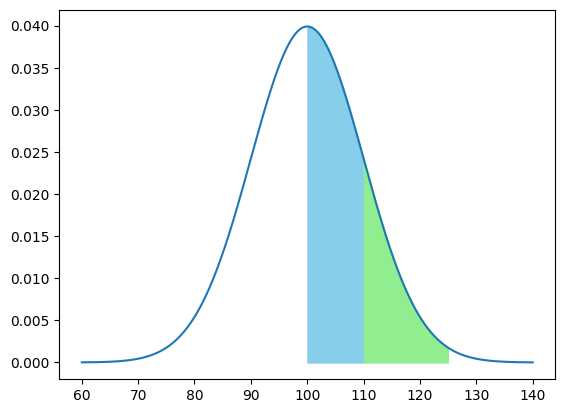

In [50]:
#시각화
x = np.linspace(mu-4*sigma, mu+4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
plt.plot(x,y)
plt.fill_between(x,y, where=(x>=100)&(x<=110),color='skyblue')
plt.fill_between(x,y, where=(x>110)&(x<125),color='lightgreen')
plt.show()